# Tfidf vectorizer approach(ML):


In [11]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Data call
product_descriptions = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/products.csv', names=['product_id', 'description'], usecols=[0, 7], skiprows=1)
product_descriptions.shape

(1260, 2)

In [5]:
# Data define and missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_id,description
0,0,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,"A red coloured, XL sized, Oxford Cloth Shirt"


In [7]:
# Data partition

product_descriptions1 = product_descriptions.head(630)

product_descriptions1["description"].head(10)

0       A red coloured, XS sized, Oxford Cloth Shirt
1        A red coloured, S sized, Oxford Cloth Shirt
2        A red coloured, M sized, Oxford Cloth Shirt
3        A red coloured, L sized, Oxford Cloth Shirt
4       A red coloured, XL sized, Oxford Cloth Shirt
5    A orange coloured, XS sized, Oxford Cloth Shirt
6     A orange coloured, S sized, Oxford Cloth Shirt
7     A orange coloured, M sized, Oxford Cloth Shirt
8     A orange coloured, L sized, Oxford Cloth Shirt
9    A orange coloured, XL sized, Oxford Cloth Shirt
Name: description, dtype: object

In [9]:
# Data preprocess

vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["description"])
X1

<630x35 sparse matrix of type '<class 'numpy.float64'>'
	with 3612 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


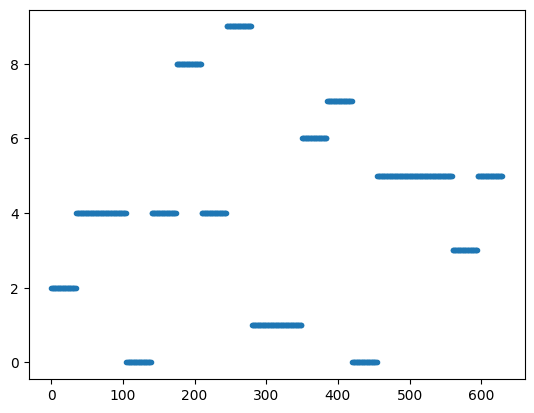

In [12]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [13]:
# Cluster vivisect

def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [18]:
# # Optimal clusters is

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 casual
 fit
 slim
 shirt
 sized
 coloured
 xs
 xl
 yellow
 red
Cluster 1:
 windbreaker
 jacket
 red
 coloured
 sized
 xs
 xl
 shirt
 chambray
 flannel
Cluster 2:
 denim
 sized
 coloured
 shirt
 jacket
 indigo
 green
 xs
 xl
 chambray
Cluster 3:
 polo
 shirt
 violet
 coloured
 sized
 xs
 xl
 flannel
 chambray
 dress
Cluster 4:
 jacket
 leather
 sized
 coloured
 bomber
 puffer
 cardigan
 xs
 xl
 yellow
Cluster 5:
 oxford
 cloth
 shirt
 blue
 sized
 coloured
 xs
 xl
 chambray
 flannel
Cluster 6:
 henley
 shirt
 yellow
 sized
 coloured
 xl
 xs
 chambray
 dress
 flannel
Cluster 7:
 linen
 shirt
 orange
 coloured
 sized
 xs
 xl
 flannel
 chambray
 dress
Cluster 8:
 collar
 mandarin
 cuban
 shirt
 sized
 coloured
 xs
 xl
 yellow
 orange
Cluster 9:
 camp
 collared
 shirt
 coloured
 sized
 xs
 xl
 yellow
 indigo
 red


In [19]:
# Recommendation method call
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [20]:
# Output
show_recommendations("A red coloured, M sized, Oxford Cloth Shirt")

Cluster 5:
 oxford
 cloth
 shirt
 blue
 sized
 coloured
 xs
 xl
 chambray
 flannel


# Transformer based approach(DL):

In [22]:
# Install dependencies
!pip install sentence-transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

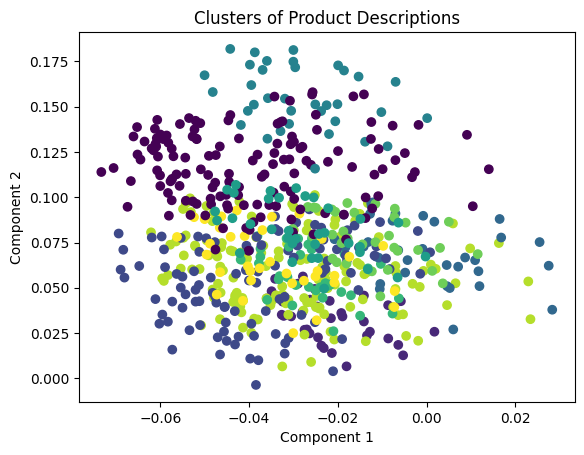

Top terms per cluster:
Cluster 0:
 A red coloured, XS sized, Denim Jacket
 A red coloured, S sized, Denim Jacket
 A red coloured, M sized, Denim Jacket
 A red coloured, L sized, Denim Jacket
 A red coloured, XL sized, Denim Jacket
 A orange coloured, XS sized, Denim Jacket
 A orange coloured, S sized, Denim Jacket
 A orange coloured, M sized, Denim Jacket
 A orange coloured, L sized, Denim Jacket
 A orange coloured, XL sized, Denim Jacket

Cluster 1:
 A red coloured, XS sized, Oxford Cloth Shirt
 A red coloured, S sized, Oxford Cloth Shirt
 A red coloured, M sized, Oxford Cloth Shirt
 A red coloured, L sized, Oxford Cloth Shirt
 A red coloured, XL sized, Oxford Cloth Shirt
 A orange coloured, XS sized, Oxford Cloth Shirt
 A orange coloured, S sized, Oxford Cloth Shirt
 A orange coloured, M sized, Oxford Cloth Shirt
 A orange coloured, L sized, Oxford Cloth Shirt
 A orange coloured, XL sized, Oxford Cloth Shirt

Cluster 2:
 A red coloured, XS sized, Camp Collared Shirt
 A red coloured, 

In [27]:
# Importing libraries
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data call
product_descriptions = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/products.csv', names=['product_id', 'description'], usecols=[0, 7], skiprows=1)

# Data define and missing values
product_descriptions = product_descriptions.dropna()
product_descriptions1 = product_descriptions.head(630)

# Data preprocess
transformer_model = SentenceTransformer('all-MiniLM-L6-v2')  # Pre-trained model for sentence embeddings
embeddings = transformer_model.encode(product_descriptions1['description'].tolist())

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1)
y_kmeans = kmeans.fit_predict(embeddings)

# Plotting clusters
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=y_kmeans, cmap='viridis')
plt.title('Clusters of Product Descriptions')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Cluster vivisect
def print_cluster(i):
    print("Cluster %d:" % i)
    cluster_indices = np.where(y_kmeans == i)[0]
    for idx in cluster_indices[:10]:
        print(' %s' % product_descriptions1.iloc[idx]['description'])
    print()

# Optimal clusters
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(embeddings)
print("Top terms per cluster:")
for i in range(true_k):
    print_cluster(i)

# Recommendation method call
def show_recommendations(product_description):
    # Encode the product description using SentenceTransformer
    embedding = transformer_model.encode([product_description])
    # Predict the cluster using KMeans
    prediction = kmeans.predict(embedding)
    # Show cluster details
    print_cluster(prediction[0])

# Output
print("Recommended:\n")
show_recommendations("A red coloured, M sized, Oxford Cloth Shirt")
